The Disccusion Below is all about the enviroment analysing of Toronto

* Introduction

The increase in the industrial pollution produced by Toronto,
Ontario is negatively impacting the city’s environmental conditions.
Although the Ministry of Environment and Climate Change has attempted to improve environment, efforts require continual re-focusing to remain effective. After research and discussion, four main
factors that can affect the environment were identified: tree cover,
pollutants released to air, pollutant carcinogenic Toxic Equivalency
Potentials (TEP) score, and pollutant non-carcinogenic TEP score.
A program which outputs a list of neighbourhoods in dire environmental condition was designed based on those four main factors
and general analysis. This program uses an input of several datasets from the Open Data Toronto database. Possible solutions to pollution and areas of environmental improvement are ultimately suggested, with the objective being to raise environmental awareness.

Using general statistical analysis on relevant environmental information collected from Open Data Toronto database, the research
on Toronto’s environmental conditions was conducted to determine
possible areas of improvement in the neighbourhoods of the city.
Four main factors that could affect the environment were identified:
pollutants released to air, pollutant carcinogenic TEP score, pollutant non-carcinogenic TEP score, and tree cover


**Method**

The primary tool chosen for data analysis was Python, a highlevel programming language. The data was from three files
The name of each neighbourhood, neighbourhood ID, total area,
total population, green rebate programs, green space, pollutant
carcinogenic TEP score, non-carcinogenic TEP score, pollutants
released to air, and tree cover were put to the first input file (Input.
txt). The renewable energy information was put in another file which
contained the following information: the name of each project, the
neighbourhood it was built in, type, size, and year of initial installation.
If two neighbourhoods have the same amount of pollutants, then
the neighbourhood with a smaller area will be considered to possess a worse environmental condition. This is under the assumption that the other factors are the same. Due to this, each factor is
divided by the total geographical area of that neighbourhood. For
instance, instead of using “pollutant carcinogenic TEP score”, “pollutant carcinogenic TEP score per unit of area” is placed to make
the evaluation fair. 

Analysing

In [81]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/neighborhoods/neighborhoods.csv
/kaggle/input/toronto/wellbeing-toronto-environment1.xlsx


In [82]:
description=pd.read_excel('/kaggle/input/toronto/wellbeing-toronto-environment1.xlsx')
description.head()

,PROVENANCE,SHORT_NAME,LONG_NAME,DESCRIPTION,URL,CURRENCY,DATE_UPDATED,DOMAIN
0,"City of Toronto, Parks Forestry & Recreation",Tree Cover,Tree Cover/Canopy by neighbourhood,"For Reference Period 2008: City of Toronto, Pa...",http://www.toronto.ca/trees/index.htm,2011-04-25,2013-03-21 09:56:08,Environment
1,"City of Toronto, Environment Office",City Green Retrofits,City Facilities Green Retrofits 2002-2008,For Reference Period 2008: Count of City of To...,http://www.toronto.ca/teo,2011-04-25,2013-03-21 09:56:38,Environment
2,Federal Ministry of the Environment,Polluting Facilities,National Pollutant Release Inventory Facilitie...,For Reference Period 2008: Federal Ministry of...,http://www.ec.gc.ca/inrp-npri/default.asp,2011-04-25,2013-03-21 09:57:25,Environment
3,"City of Toronto, Parks Forestry & Recreation",Green Spaces,Green/Open Spaces,"For Reference Period 2008: City of Toronto, Pa...",http://www.toronto.ca/parks,2011-04-25,2013-03-27 11:24:50,Environment
4,Toronto Water,Green Rebate Programs,Water-Saving Rebate Program (toilets and washi...,"For Reference Period 2008: City of Toronto, To...",http://www.toronto.ca/water,2011-04-25,2013-03-18 10:02:32,Environment


In [83]:
neighborhood=pd.read_csv('/kaggle/input/neighborhoods/neighborhoods.csv')
neighborhood.head()

,Neighbourhood,Neighbourhood Id,Green Rebate Programs,Green Spaces,Pollutant Carcinogenic TEP Score,Pollutant Non-Carcinogenic TEP Score,Pollutants Released to Air,Tree Cover
0,West Humber-Clairville,1,428,2.078836,5737.87,18658529.73,1585690,2.895861e+06
1,Mount Olive-Silverstone-Jamestown,2,250,1.048870,29.76,2015.00,31,1.303945e+06
2,Thistletown-Beaumond Heights,3,118,0.939108,0.00,0.00,0,1.499130e+06
3,Rexdale-Kipling,4,121,0.240663,0.00,37632.00,35920,7.563823e+05
4,Elms-Old Rexdale,5,73,0.730090,0.00,309.00,309,9.975108e+05


> **Indiviual Column Wise Study**

* Study about Green Rebate Programs

An Energy Rebate Program, or Energy Credit Incentive Program, provides a cash rebate program for customers planning to install new, energy efficient information technology (IT) equipment or cooling systems. These programs push companies to construct more energy efficient data centers, or to consolidate compute, storage and networking resources via virtualization technologies.

An Energy Rebate Program is a simple way for customers to apply and qualify for various energy rebates offered by energy service companies, or utilities, in their respective coverage areas. To lower IT equipment's carbon footprint, data center customers are looking at processes for protecting and respecting the environment through eco-friendly operations and data center design. This idea is being pushed by organizations such as The Green Grid, Climate Savers Computing Initiative and the Silicon Valley Leadership Group. Customer demand for energy rebates encourages the development of programs for IT vendors' computers, storage, networking or data center facilities. IT vendors are taking steps to provide more energy efficient IT systems and working with utilities to secure rebate savings for customers and their new installations.

In [84]:
print('Maximum number of Green Rebate Programs are at',neighborhood['Green Rebate Programs'].idxmax(),'with',neighborhood['Green Rebate Programs'].max(),'programs')

Maximum number of Green Rebate Programs are at 129 with 815 programs


Text(0.5, 0, 'IDS')

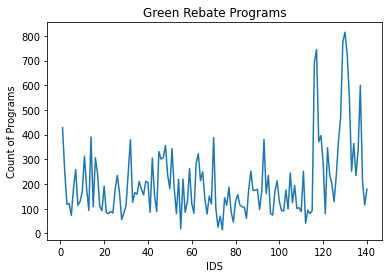

In [85]:
plt.plot(neighborhood['Neighbourhood Id'],neighborhood['Green Rebate Programs'])
plt.title('Green Rebate Programs')
plt.ylabel('Count of Programs')
plt.xlabel('IDS')

* Study about Green Spaces

Open space is any open piece of land that is undeveloped (has no buildings or other built structures) and is accessible to the public. Open space can include:

Green space (land that is partly or completely covered with grass, trees, shrubs, or other vegetation). Green space includes parks, community gardens, and cemeteries.
Schoolyards
Playgrounds
Public seating areas
Public plazas
Vacant lots
Open space provides recreational areas for residents and helps to enhance the beauty and environmental quality of neighborhoods. But with this broad range of recreational sites comes an equally broad range of environmental issues. Just as in any other land uses, the way parks are managed can have good or bad environmental impacts, from pesticide runoff, siltation from overused hiking and logging trails, and destruction of habitat.

In [86]:
print('Maximum Green Space land is at',neighborhood['Green Spaces'].idxmax(),'with',neighborhood['Green Spaces'].max(),' Sq.Kms area')

Maximum Green Space land is at 130 with 14.27145522  Sq.Kms area


Text(0.5, 0, 'IDS')

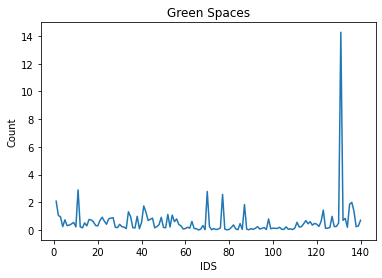

In [87]:
plt.plot(neighborhood['Neighbourhood Id'],neighborhood['Green Spaces'])
plt.title('Green Spaces')
plt.ylabel('Count')
plt.xlabel('IDS')

*  Pollutant Score 

A pollutant is a substance or energy introduced into the environment that has undesired effects, or adversely affects the usefulness of a resource. A pollutant may cause long- or short-term damage by changing the growth rate of plant or animal species, or by interfering with human amenities, comfort, health, or property values. Some pollutants are biodegradable and therefore will not persist in the environment in the long term. However, the degradation products of some pollutants are themselves polluting such as the products DDE and DDD produced from the degradation of DDT.

Pollutants, towards which the environment has low absorptive capacity are called stock pollutants.[1] (e.g. persistent organic pollutants such as PCBs, non-biodegradable plastics and heavy metals). Stock pollutants accumulate in the environment over time. The damage they cause increases as more pollutant is emitted, and persists as the pollutant accumulates. Stock pollutants can create a burden for the future generations, bypassing on the damage that persists well after the benefits received from incurring that damage, have been forgotten

Notable pollutants include the following groups

Mercury Hg,
Persistent organic pollutants POPs,
Ozone Ozone,
Particulate matter PM,
Environmental Persistent Pharmaceutical Pollutants EPPP,
Polycyclic aromatic hydrocarbons PAHs,
Volatile organic compounds VOCs

What is Carinogen?


A carcinogen is any substance, radionuclide, or radiation that promotes carcinogenesis, the formation of cancer. This may be due to the ability to damage the genome or to the disruption of cellular metabolic processes. Several radioactive substances are considered carcinogens, but their carcinogenic activity is attributed to the radiation, for example gamma rays and alpha particles, which they emit. Common examples of non-radioactive carcinogens are inhaled asbestos, certain dioxins, and tobacco smoke. Although the public generally associates carcinogenicity with synthetic chemicals, it is equally likely to arise in both natural and synthetic substances.[1] Carcinogens are not necessarily immediately toxic; thus, their effect can be insidious.

Something that is not known to cause cancer is Non Carcinogen

 The next factor is the Pollutant Carcinogenic
TEP score. TEP indicate the relative health risk associated with the
release of one pound of a chemical. The Pollutant Carcinogenic TEP
score is a general score measuring how various chemicals affect the
environment and increase the risk of cancer


The Pollutant non-carcinogenic TEP score refers to non-carcinogenic compounds which, negatively affect the environmental conditions of the neighbourhoods. Non-carcinogenic pollutants can contribute to the build-up of greenhouse gases. 

the number of
polluting facilities has a correlation coefficient of 0.3367 with
the amount of pollutants released to air. To further utilize the
result, the companies producing the pollutants in those neighbourhoods need to be found. Setting up a tighter limit on the
allowed numbers of pollutants released can be an effective
method to reduce the values.

In [88]:
print('Maximum Pollutant Carcinogenic Score is at',neighborhood['Pollutant Carcinogenic TEP Score'].idxmax(),'with',neighborhood['Pollutant Carcinogenic TEP Score'].max(),' score')

Maximum Pollutant Carcinogenic Score is at 26 with 205788.1  score


In [89]:
print('Maximum Pollutant Non-Carcinogenic Score is at',neighborhood['Pollutant Non-Carcinogenic TEP Score'].idxmax(),'with',neighborhood['Pollutant Non-Carcinogenic TEP Score'].max(),' score')

Maximum Pollutant Non-Carcinogenic Score is at 135 with 54076528.3  score


* Representing  Pollutant Carcinogenic Score

Text(0.5, 0, 'Neighborhood Ids')

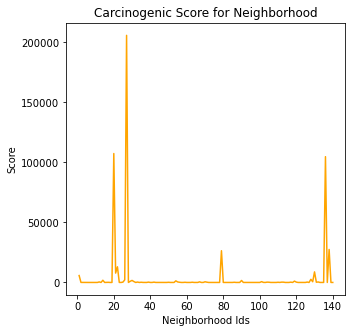

In [90]:
plt.figure(figsize=(5,5))
plt.plot(neighborhood['Neighbourhood Id'],neighborhood['Pollutant Carcinogenic TEP Score'],color='orange')
plt.title('Carcinogenic Score for Neighborhood')
plt.ylabel('Score')
plt.xlabel('Neighborhood Ids')

In [91]:
print('Neighborhood that is safe and with least Score is',neighborhood['Pollutant Carcinogenic TEP Score'].idxmin())

Neighborhood that is safe and with least Score is 2


Non-carcinogenic pollutants, though not as important as those which are
carcinogenic, can contribute to the build-up of greenhouse gases and a longterm environmental influence, indicating an overall environmental standard. The
sifting of this factor may further narrow the scope of the final set

* Representing Pollutant Non-Carcinogenic Score

Text(0.5, 0, 'Neighborhood Ids')

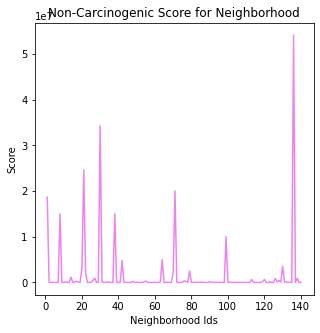

In [92]:
plt.figure(figsize=(5,5))
plt.plot(neighborhood['Neighbourhood Id'],neighborhood['Pollutant Non-Carcinogenic TEP Score'],color='violet')

plt.title('Non-Carcinogenic Score for Neighborhood')
plt.ylabel('Score')
plt.xlabel('Neighborhood Ids')

* Released Pollutants

Text(0.5, 0, 'Neighborhood Ids')

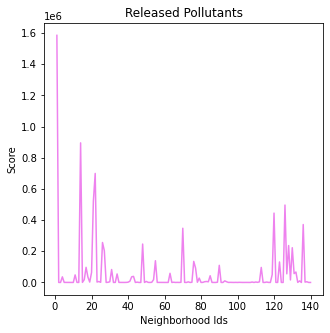

In [93]:
plt.figure(figsize=(5,5))
plt.plot(neighborhood['Neighbourhood Id'],neighborhood['Pollutants Released to Air'],color='violet')
plt.title('Released Pollutants')
plt.ylabel('Score')
plt.xlabel('Neighborhood Ids')

* What is Tree Cover??

 The last factor used is
the tree cover. The less tree covers a neighbourhood has, the more
space there is for industries, companies, and building. Ultimately,
this would result in higher production pollutants and carcinogens.
The tree cover was used to resolve the problem of two neighbourhoods with the same amount of pollutants, in which the tree cover
was be used to determine which neighbourhood needs immediate
attention over the other


Planting trees still being an important means of environmental improvement,
tree cover, as one of the four main factors chosen, works effectively to help
choose a group of immediate attention. Thus, given that all other factors are
similar, neighborhoods with less tree cover should be of priority.

In [94]:
print('Neighbourhood with maximum tree cover is',neighborhood['Tree Cover'].idxmax(),'with',neighborhood['Tree Cover'].max(),'Sq.km Area')

Neighbourhood with maximum tree cover is 130 with 12888043.88 Sq.km Area


Text(0.5, 0, 'IDS')

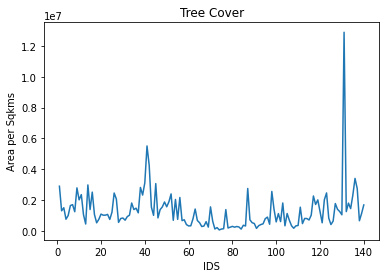

In [95]:
plt.plot(neighborhood['Neighbourhood Id'],neighborhood['Tree Cover'])
plt.title('Tree Cover')
plt.ylabel('Area per Sqkms')
plt.xlabel('IDS')

In [104]:
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
X = neighborhood.values[:,1:]
X = np.nan_to_num(X)
Cluster = StandardScaler().fit_transform(X)
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
neighborhood['Labels']=labels
neighborhood.head()

,Neighbourhood,Neighbourhood Id,Green Rebate Programs,Green Spaces,Pollutant Carcinogenic TEP Score,Pollutant Non-Carcinogenic TEP Score,Pollutants Released to Air,Tree Cover,Labels
0,West Humber-Clairville,1,428,2.078836,5737.87,18658529.73,1585690,2.895861e+06,2
1,Mount Olive-Silverstone-Jamestown,2,250,1.048870,29.76,2015.00,31,1.303945e+06,0
2,Thistletown-Beaumond Heights,3,118,0.939108,0.00,0.00,0,1.499130e+06,0
3,Rexdale-Kipling,4,121,0.240663,0.00,37632.00,35920,7.563823e+05,0
4,Elms-Old Rexdale,5,73,0.730090,0.00,309.00,309,9.975108e+05,0


Relation of Columns between each other 

In [105]:
neighborhood.corr()

,Neighbourhood Id,Green Rebate Programs,Green Spaces,Pollutant Carcinogenic TEP Score,Pollutant Non-Carcinogenic TEP Score,Pollutants Released to Air,Tree Cover,Labels
Neighbourhood Id,1.000000,0.284599,0.060945,-0.052405,-0.045265,-0.137113,-0.017017,-0.145466
Green Rebate Programs,0.284599,1.000000,0.370050,0.012705,0.027892,0.206497,0.459341,-0.027076
Green Spaces,0.060945,0.370050,1.000000,0.043634,0.085224,0.141225,0.851432,0.043654
Pollutant Carcinogenic TEP Score,-0.052405,0.012705,0.043634,1.000000,0.304657,0.154737,0.080975,0.064209
Pollutant Non-Carcinogenic TEP Score,-0.045265,0.027892,0.085224,0.304657,1.000000,0.338007,0.119701,0.725485
Pollutants Released to Air,-0.137113,0.206497,0.141225,0.154737,0.338007,1.000000,0.156577,0.350162
Tree Cover,-0.017017,0.459341,0.851432,0.080975,0.119701,0.156577,1.000000,0.080435
Labels,-0.145466,-0.027076,0.043654,0.064209,0.725485,0.350162,0.080435,1.000000


**Results**
* More the Green Rebate Programs more the Green Spaces more the Tree Cover. It also further implies that more tree cover leads to less pollutants scores 
* It also implies that there should be more green rebate programs for good enviroment and increasing the Tree Covers all around Toronto 
* Labels formed are high correlated with Pollutant Non-Carcinogenic TEP Score

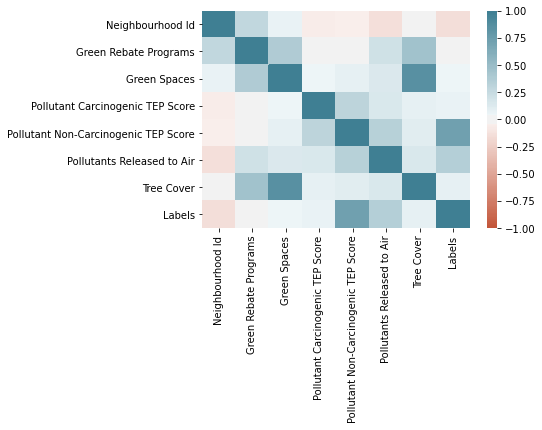

In [106]:
sns.heatmap(neighborhood.corr(),vmin=-1,vmax=1,cmap=sns.diverging_palette(20,220,n=200))

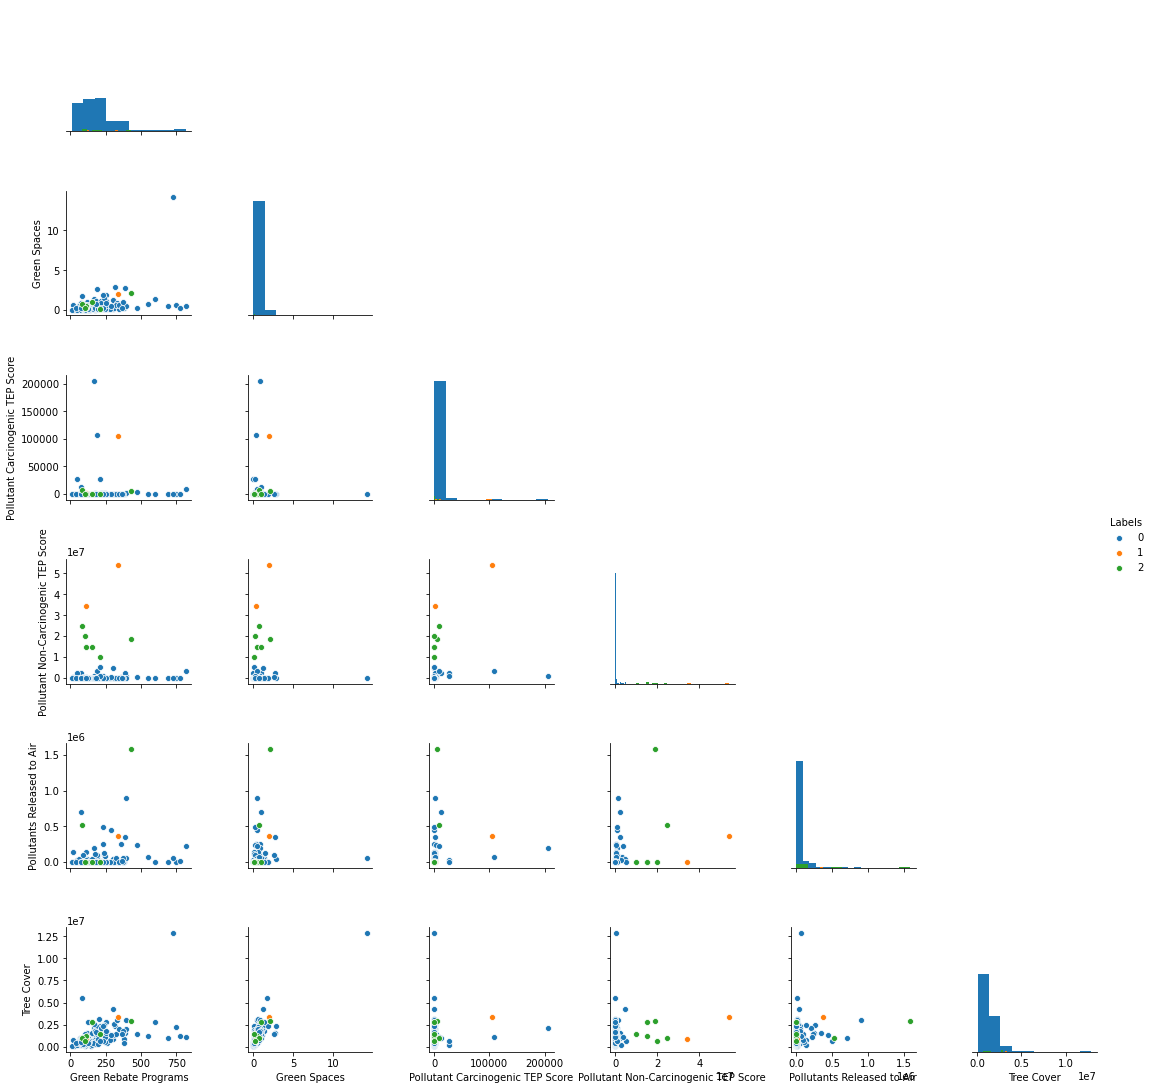

In [107]:
sns.pairplot(neighborhood.iloc[:,2:],hue='Labels',diag_kind='hist',corner=True)

In [113]:
neighborhood.groupby('Labels').mean()

,Neighbourhood Id,Green Rebate Programs,Green Spaces,Pollutant Carcinogenic TEP Score,Pollutant Non-Carcinogenic TEP Score,Pollutants Released to Air,Tree Cover
Labels,,,,,,,
0,71.712121,206.696970,0.564246,3102.363258,2.520922e+05,43694.522727,1.251157e+06
1,83.000000,225.500000,1.199782,53227.165000,4.416561e+07,188017.500000,2.119086e+06
2,39.666667,182.833333,0.752392,2291.881667,1.722099e+07,351408.500000,1.668406e+06
